<a href="https://colab.research.google.com/github/mertqara/PopularGameGenres/blob/main/dataVisualisationAndAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from GitHub
url = "http://raw.githubusercontent.com/mertqara/PopularGameGenres/refs/heads/main/cleaned_merged_final_data.csv"
eda_df = pd.read_csv(url)

# Clean and prepare
eda_df['Release_Year'] = eda_df['Release_Year'].astype('Int64')
eda_df['MetaScore'] = pd.to_numeric(eda_df['MetaScore'], errors='coerce')
eda_df['UserReview'] = pd.to_numeric(eda_df['UserReview'], errors='coerce')

# Create AAA vs Indie label
aaa_publishers = ['Nintendo', 'Sony', 'Electronic Arts', 'Ubisoft', 'Activision',
                  'Microsoft Game Studios', 'Take-Two Interactive', 'Bethesda Softworks']
eda_df['Studio_Type'] = eda_df['Publisher'].apply(
    lambda x: 'AAA' if any(big in str(x) for big in aaa_publishers) else 'Indie'
)

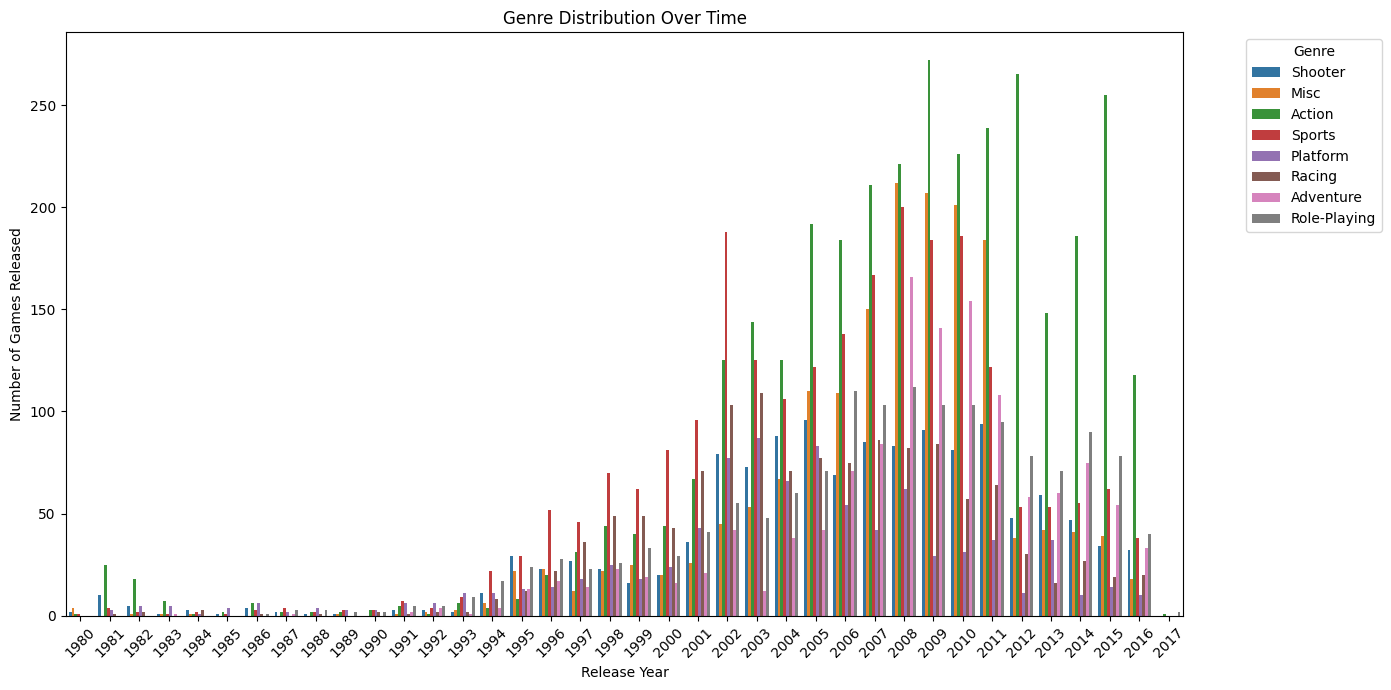

In [3]:
# 2.1 Genre Distribution Over Time
genre_over_time = eda_df.dropna(subset=['Genre', 'Release_Year'])
genre_over_time['Genre'] = genre_over_time['Genre'].str.strip()

# Plot genre trend
plt.figure(figsize=(14, 7))
top_genres = genre_over_time['Genre'].value_counts().nlargest(8).index
genre_trend = genre_over_time[genre_over_time['Genre'].isin(top_genres)]

sns.countplot(data=genre_trend, x='Release_Year', hue='Genre')
plt.title('Genre Distribution Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

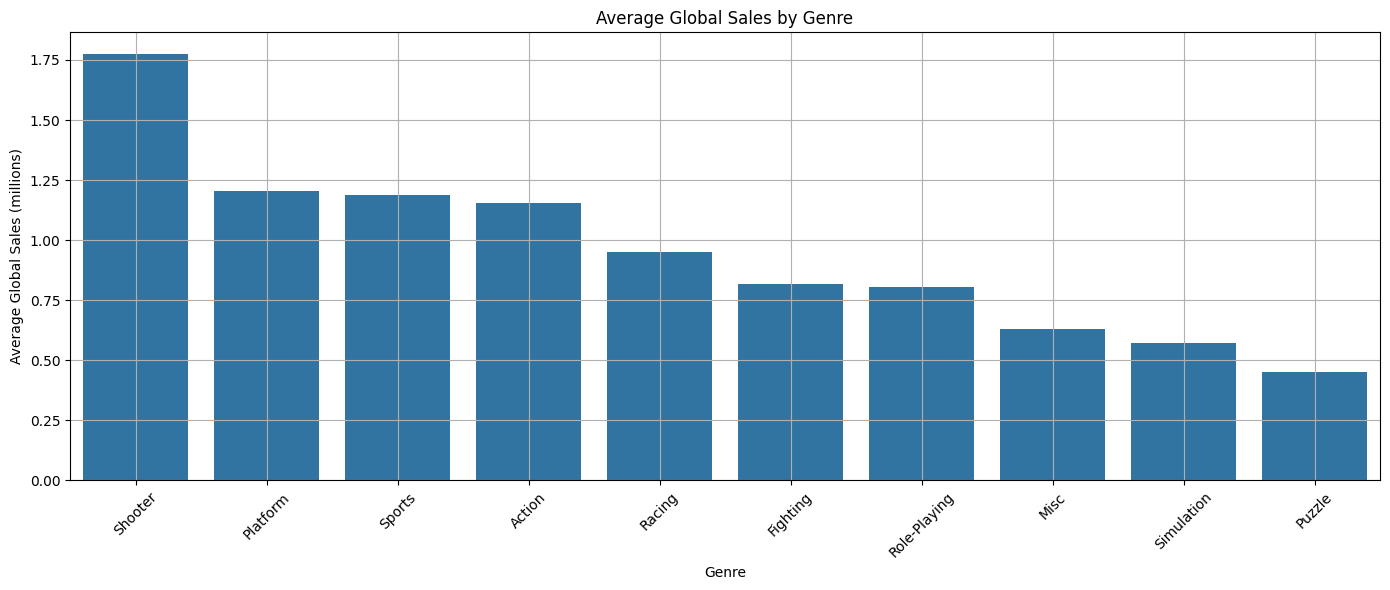

In [4]:
# 2.2 Sales Trends by Genre (Average Global Sales)
plt.figure(figsize=(14, 6))
genre_sales = eda_df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=genre_sales.index, y=genre_sales.values)
plt.title('Average Global Sales by Genre')
plt.ylabel('Average Global Sales (millions)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

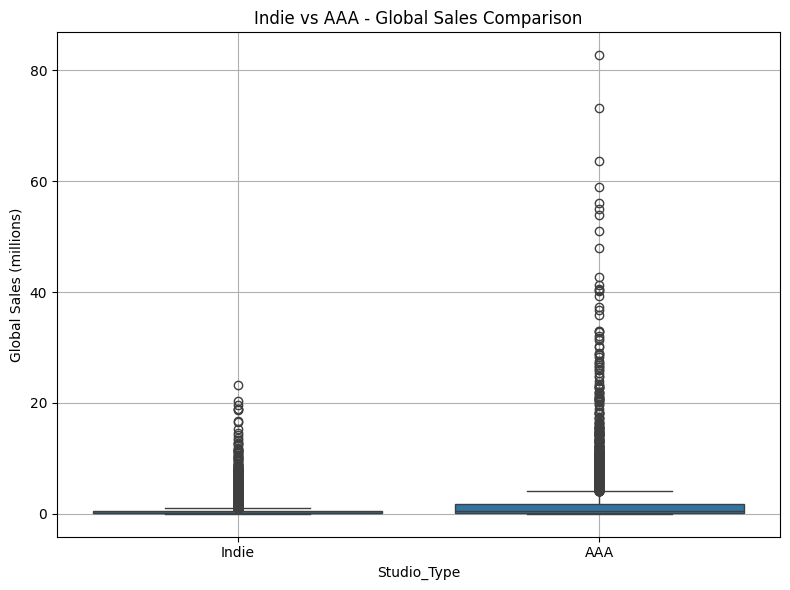

In [5]:
# 2.3 Indie vs AAA Impact on Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_df, x='Studio_Type', y='Global_Sales')
plt.title('Indie vs AAA - Global Sales Comparison')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

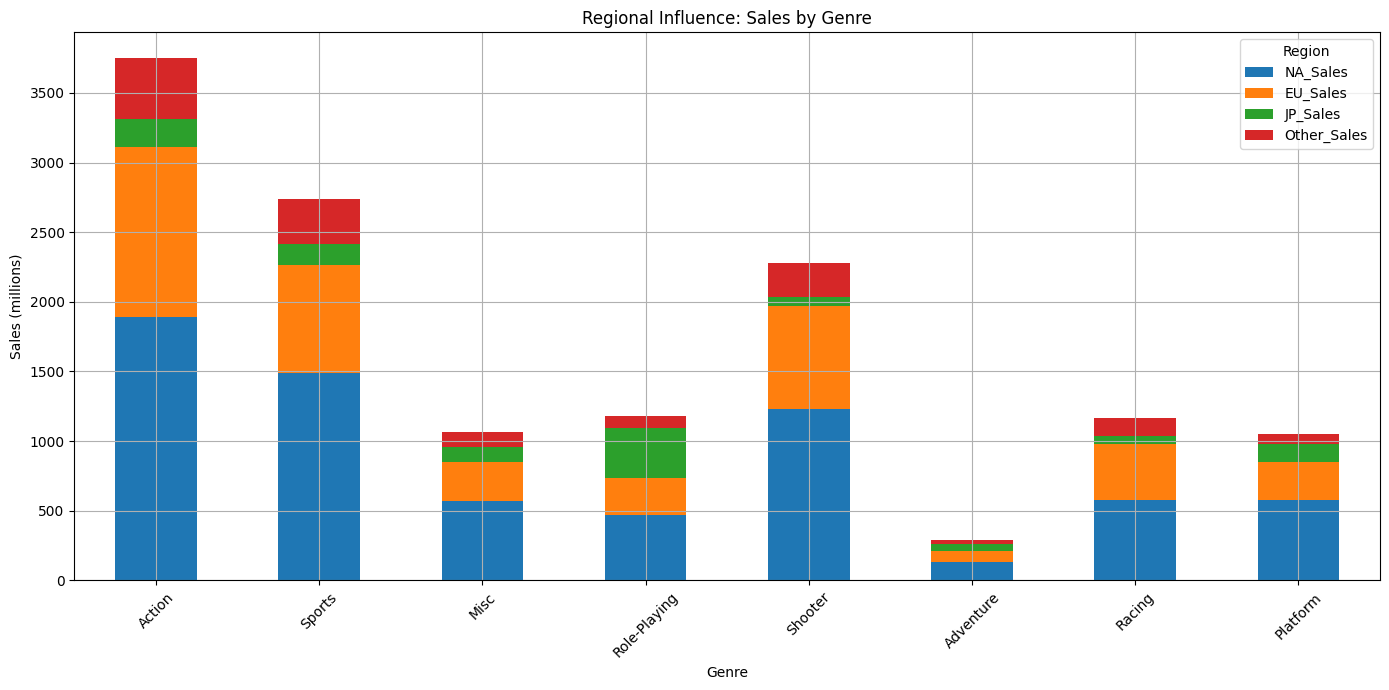

In [6]:
# 2.4 Regional Influence (Favorite Genre by Region)
region_sales = eda_df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
region_sales = region_sales.loc[top_genres]

region_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Regional Influence: Sales by Genre')
plt.ylabel('Sales (millions)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()

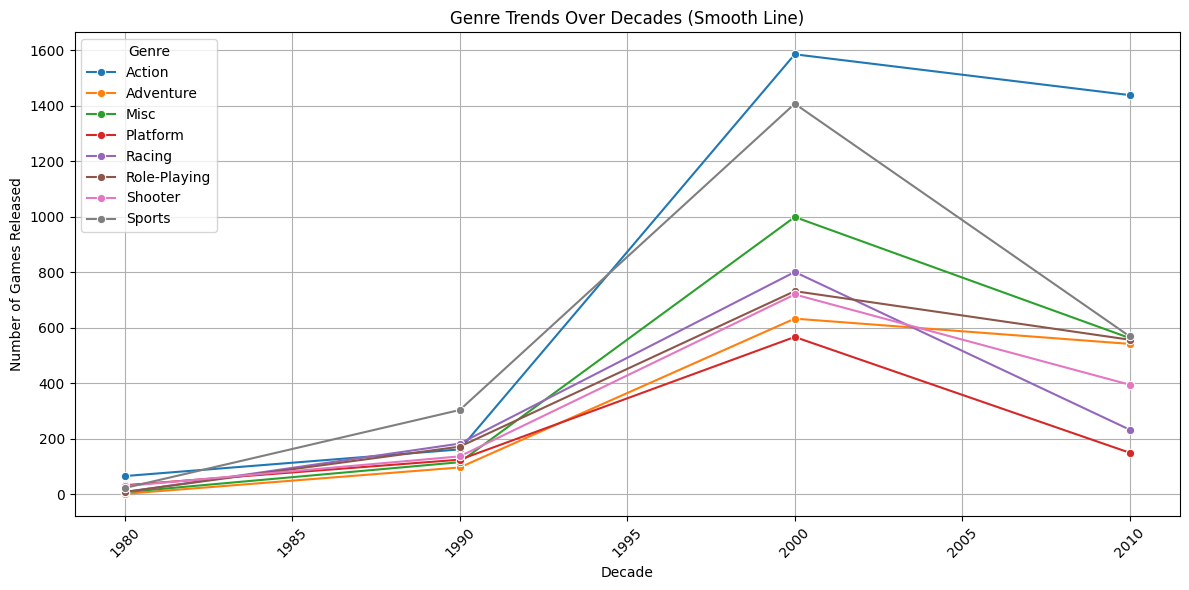

In [7]:
# Correlation Analysis ---

# 3.1 Genre vs Release Year: Genre Evolution Over Time

# 1) Start from genre_trend (whatever you defined it as),
#    but make an explicit copy before modifying
genre_trend_clean = genre_trend[['Genre', 'Release_Year']].dropna().copy()

# 2) Now it’s safe to change types without warnings
genre_trend_clean['Release_Year'] = genre_trend_clean['Release_Year'].astype(int)

# 3) Create 'Decade' column from 'Release_Year'
genre_trend_clean['Decade'] = (genre_trend_clean['Release_Year'] // 10) * 10

# 4) Group and count number of games by Decade and Genre
genre_decade = (
    genre_trend_clean
    .groupby(['Decade', 'Genre'])
    .size()
    .reset_index(name='Game_Count')
)

# 5) Plot Smooth Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=genre_decade,
    x='Decade',
    y='Game_Count',
    hue='Genre',
    marker='o'
)
plt.title('Genre Trends Over Decades (Smooth Line)')
plt.xlabel('Decade')
plt.ylabel('Number of Games Released')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Genre')
plt.tight_layout()
plt.show()

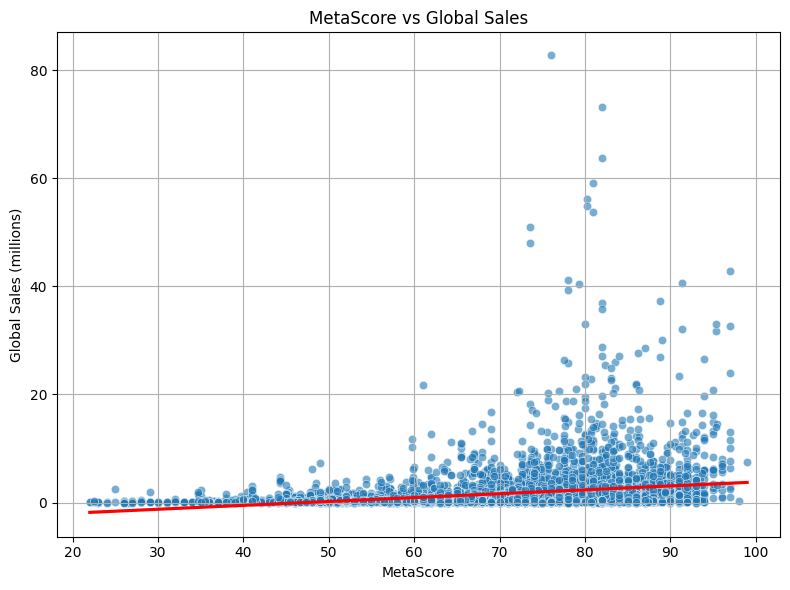

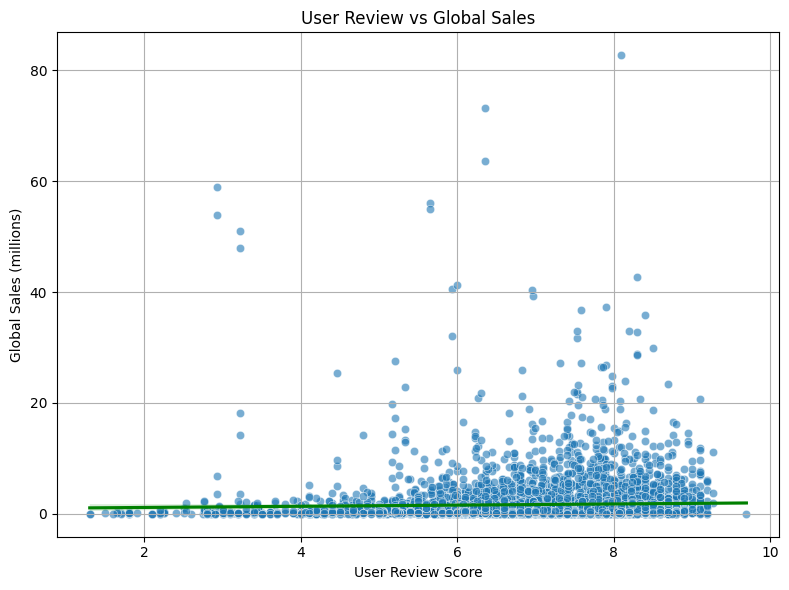

Correlation between MetaScore and Global Sales: 0.24
Correlation between User Review and Global Sales: 0.03


In [8]:
# 3.2 Game Ratings vs Global Sales

# Drop missing scores
rating_sales_df = eda_df.dropna(subset=['MetaScore', 'UserReview', 'Global_Sales'])

# Scatter: MetaScore vs Global Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rating_sales_df, x='MetaScore', y='Global_Sales', alpha=0.6)
sns.regplot(data=rating_sales_df, x='MetaScore', y='Global_Sales', scatter=False, color='red')
plt.title('MetaScore vs Global Sales')
plt.xlabel('MetaScore')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter: UserReview vs Global Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=rating_sales_df, x='UserReview', y='Global_Sales', alpha=0.6)
sns.regplot(data=rating_sales_df, x='UserReview', y='Global_Sales', scatter=False, color='green')
plt.title('User Review vs Global Sales')
plt.xlabel('User Review Score')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation calculation
correlation_metascore = rating_sales_df['MetaScore'].corr(rating_sales_df['Global_Sales'])
correlation_userreview = rating_sales_df['UserReview'].corr(rating_sales_df['Global_Sales'])

print(f"Correlation between MetaScore and Global Sales: {correlation_metascore:.2f}")
print(f"Correlation between User Review and Global Sales: {correlation_userreview:.2f}")

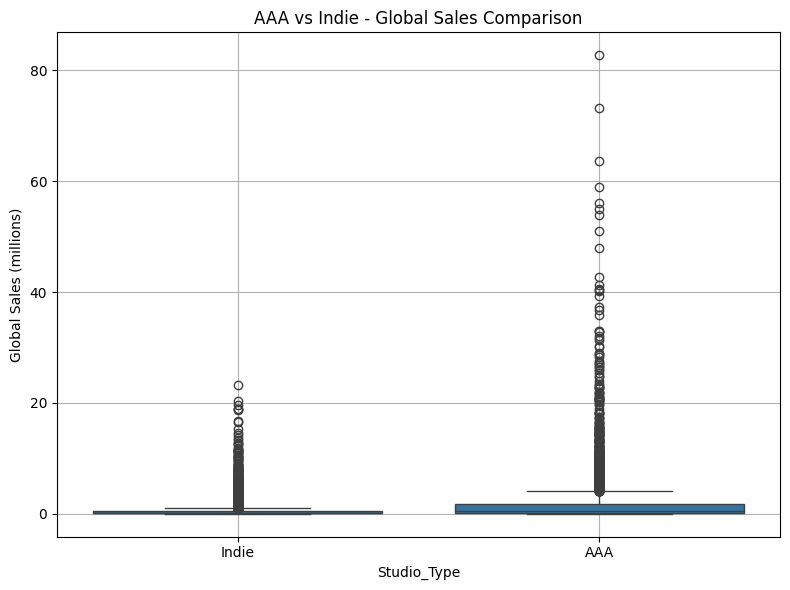

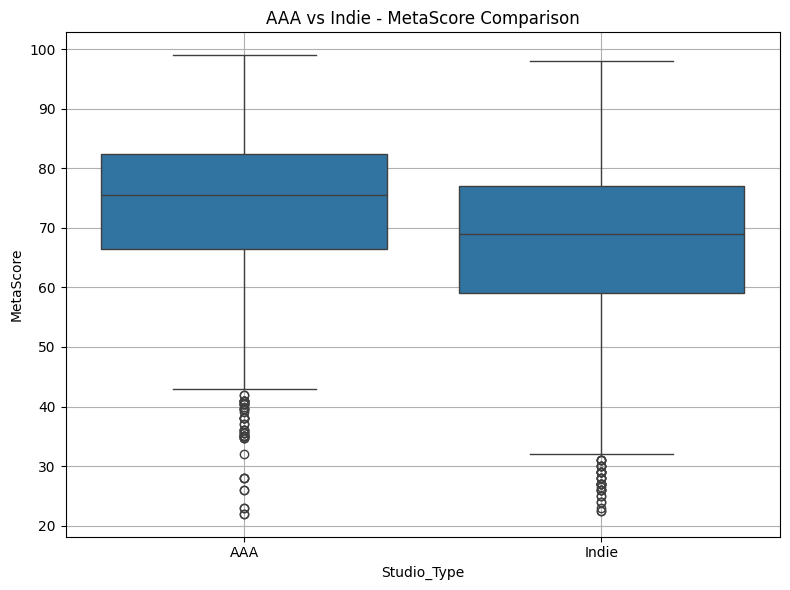

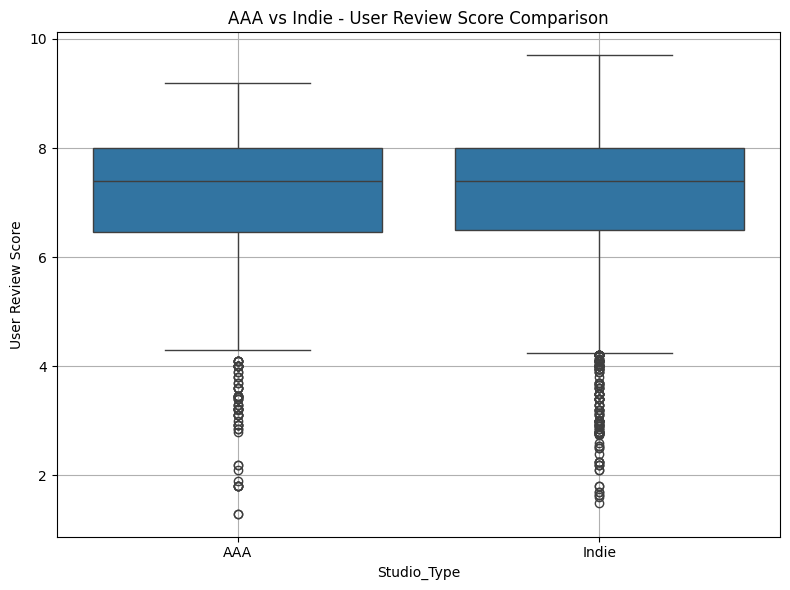

In [9]:
# 3.3 AAA vs Indie Studio Influence on Sales and Scores

# Boxplot: Global Sales
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_df, x='Studio_Type', y='Global_Sales')
plt.title('AAA vs Indie - Global Sales Comparison')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: MetaScore
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_df.dropna(subset=['MetaScore']), x='Studio_Type', y='MetaScore')
plt.title('AAA vs Indie - MetaScore Comparison')
plt.ylabel('MetaScore')
plt.grid(True)
plt.tight_layout()
plt.show()

# Boxplot: UserReview
plt.figure(figsize=(8, 6))
sns.boxplot(data=eda_df.dropna(subset=['UserReview']), x='Studio_Type', y='UserReview')
plt.title('AAA vs Indie - User Review Score Comparison')
plt.ylabel('User Review Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
import numpy as np
from scipy import stats

# Alias for clarity (optional)
df = eda_df.copy()

# Ensure Global_Sales is numeric
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

# Hypothesis Test 1: AAA vs Indie - Global Sales
aaa_sales   = df[df['Studio_Type'] == 'AAA']['Global_Sales'].dropna()
indie_sales = df[df['Studio_Type'] == 'Indie']['Global_Sales'].dropna()

# Sanity check
print(f"Samples: AAA={len(aaa_sales)}, Indie={len(indie_sales)}")

# Welch’s t-test
tstat1, pvalue1 = stats.ttest_ind(aaa_sales, indie_sales, equal_var=False)

# Cohen’s d for effect size
cohens_d = (
    aaa_sales.mean() - indie_sales.mean()
) / np.sqrt((aaa_sales.std(ddof=1)**2 + indie_sales.std(ddof=1)**2) / 2)

# Print results with scientific notation for p
print("=== Hypothesis Testing Results ===")
print("AAA vs Indie Global Sales:")
print(f"   t-statistic = {tstat1:.4f}")
print(f"   p-value      = {pvalue1:.3e}")
print(f"   Cohen’s d    = {cohens_d:.3f}")
print(
    "   Significant difference (p < 0.05)"
    if pvalue1 < 0.05
    else "   No significant difference (p ≥ 0.05)"
)


Samples: AAA=5343, Indie=10947
=== Hypothesis Testing Results ===
AAA vs Indie Global Sales:
   t-statistic = 22.0724
   p-value      = 1.087e-103
   Cohen’s d    = 0.419
   Significant difference (p < 0.05)


In [11]:
import numpy as np
from scipy import stats
import pandas as pd

# (If not already done) ensure df exists and Global_Sales/MetaScore are numeric
# df = eda_df.copy()
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')
df['MetaScore']    = pd.to_numeric(df['MetaScore'],    errors='coerce')

# Hypothesis Test 2: High vs Low MetaScore - Global Sales
high_meta = df[df['MetaScore'] > 80]['Global_Sales'].dropna()
low_meta  = df[df['MetaScore'] <= 80]['Global_Sales'].dropna()

# Sanity check
print(f"Samples: HighMeta={len(high_meta)}, LowMeta={len(low_meta)}")

# Welch’s t-test
tstat2, pvalue2 = stats.ttest_ind(high_meta, low_meta, equal_var=False)

# Cohen’s d
cohens_d2 = (
    high_meta.mean() - low_meta.mean()
) / np.sqrt((high_meta.std(ddof=1)**2 + low_meta.std(ddof=1)**2) / 2)

# Print results
print("2High vs Low MetaScore Global Sales:")
print(f"   t-statistic = {tstat2:.4f}")
print(f"   p-value      = {pvalue2:.3e}")
print(f"   Cohen’s d    = {cohens_d2:.3f}")
print(
    "   Significant difference (p < 0.05)"
    if pvalue2 < 0.05
    else "   No significant difference (p ≥ 0.05)"
)


Samples: HighMeta=1684, LowMeta=5369
2High vs Low MetaScore Global Sales:
   t-statistic = 13.7427
   p-value      = 4.585e-41
   Cohen’s d    = 0.443
   Significant difference (p < 0.05)


In [12]:
import numpy as np
from scipy import stats
import pandas as pd

# (If not already done) ensure df exists and JP_Sales/Global_Sales are numeric
# df = eda_df.copy()
df['JP_Sales']     = pd.to_numeric(df['JP_Sales'],     errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

# Hypothesis Test 3: Japan Sales vs Global Sales
japan_sales  = df[df['JP_Sales'] > 0]['JP_Sales'].dropna()
global_sales = df[df['Global_Sales'] > 0]['Global_Sales'].dropna()

# Sanity check
print(f"Samples: JapanSales={len(japan_sales)}, GlobalSales={len(global_sales)}")

# Welch’s t-test
tstat3, pvalue3 = stats.ttest_ind(japan_sales, global_sales, equal_var=False)

# Cohen’s d for effect size
cohens_d3 = (
    japan_sales.mean() - global_sales.mean()
) / np.sqrt((japan_sales.std(ddof=1)**2 + global_sales.std(ddof=1)**2) / 2)

# Print results with scientific notation for p-value
print("Japan Sales vs Global Sales:")
print(f"   t-statistic = {tstat3:.4f}")
print(f"   p-value      = {pvalue3:.3e}")
print(f"   Cohen’s d    = {cohens_d3:.3f}")
print(
    "    Significant difference (p < 0.05)"
    if pvalue3 < 0.05
    else "    No significant difference (p ≥ 0.05)"
)


Samples: JapanSales=6084, GlobalSales=16290
Japan Sales vs Global Sales:
   t-statistic = -31.2171
   p-value      = 1.247e-208
   Cohen’s d    = -0.355
    Significant difference (p < 0.05)


In [13]:
import pandas as pd
import numpy as np

# 1) Start from your cleaned EDA frame
df = eda_df.copy()

# 2) Derive new numeric features
# — Log‐transform skewed target
df['Log_Global_Sales'] = np.log1p(df['Global_Sales'])

# — Age of a game in years (assuming current year = 2025)
df['Game_Age'] = 2025 - df['Release_Year']

# — Regional sales ratio: share of Japanese sales in total
df['JP_Sales_Ratio'] = df['JP_Sales'] / df['Global_Sales']

# 3) Interaction feature
df['Meta_User_Interaction'] = df['MetaScore'] * df['UserReview']

# 4) Temporal bucketing
df['Decade'] = (df['Release_Year'] // 10) * 10

# 5) Categorical encoding (ready for ML pipelines)
# — One‐hot for Genre and Platform
df = pd.get_dummies(df, columns=['Genre', 'Platform'], drop_first=True)

# — Ordinal mapping for Studio_Type (AAA > Indie)
df['Studio_Type_Ord'] = df['Studio_Type'].map({'Indie':0, 'AAA':1})

# 6) Quick sanity check
print(df[['Log_Global_Sales','Game_Age','JP_Sales_Ratio',
          'Meta_User_Interaction','Decade','Studio_Type_Ord']].head())
print("\nShape after dummy‐encoding:", df.shape)


   Log_Global_Sales  Game_Age  JP_Sales_Ratio  Meta_User_Interaction  Decade  \
0          0.343590        27        0.292683                    NaN    1990   
1          0.157004        19        1.000000                    NaN    2000   
2          0.207014        19        0.000000                    NaN    2000   
3          0.148420        19        1.000000                    NaN    2000   
4          0.157004        18        1.000000                    NaN    2000   

   Studio_Type_Ord  
0                0  
1                0  
2                0  
3                0  
4                0  

Shape after dummy‐encoding: (16290, 58)


In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LinearRegression
from sklearn.metrics         import r2_score

# 1) Drop any non‐numeric or “cheating” columns
cols_to_drop = [
    'Log_Global_Sales',  # your target
    'Global_Sales',
    'JP_Sales',
    'Release_Year',
    'Publisher',
    'Name',
    'Developer',
    # add more free‐text or unwanted cols here
]
X = df.drop(columns=cols_to_drop, errors='ignore')

# 2) Keep only numeric features
X = X.select_dtypes(include=[np.number])

# 3) Define target
y = df['Log_Global_Sales']

# 4) Drop any rows that still have NaNs in X (and align y)
non_na_idx = X.dropna().index
X_clean   = X.loc[non_na_idx]
y_clean   = y.loc[non_na_idx]

print(f"Dropped {len(X) - len(X_clean)} rows with missing values; {len(X_clean)} rows remain.")

# 5) Train/test split and fit
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, random_state=42
)
model = LinearRegression().fit(X_train, y_train)

# 6) Evaluate
print("R² on test (dropping NaNs):", r2_score(y_test, model.predict(X_test)))

Dropped 9534 rows with missing values; 6756 rows remain.
R² on test (dropping NaNs): 0.6267584485130828


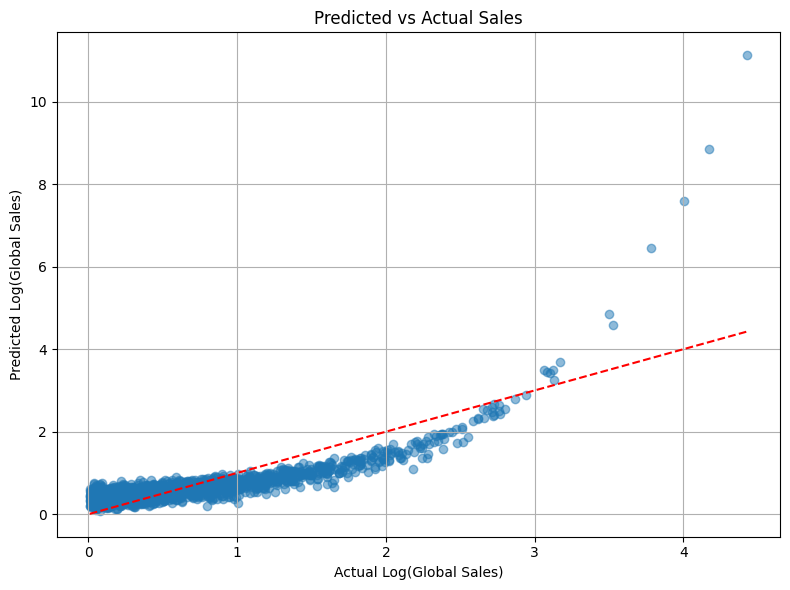

In [15]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Log(Global Sales)')
plt.ylabel('Predicted Log(Global Sales)')
plt.title('Predicted vs Actual Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

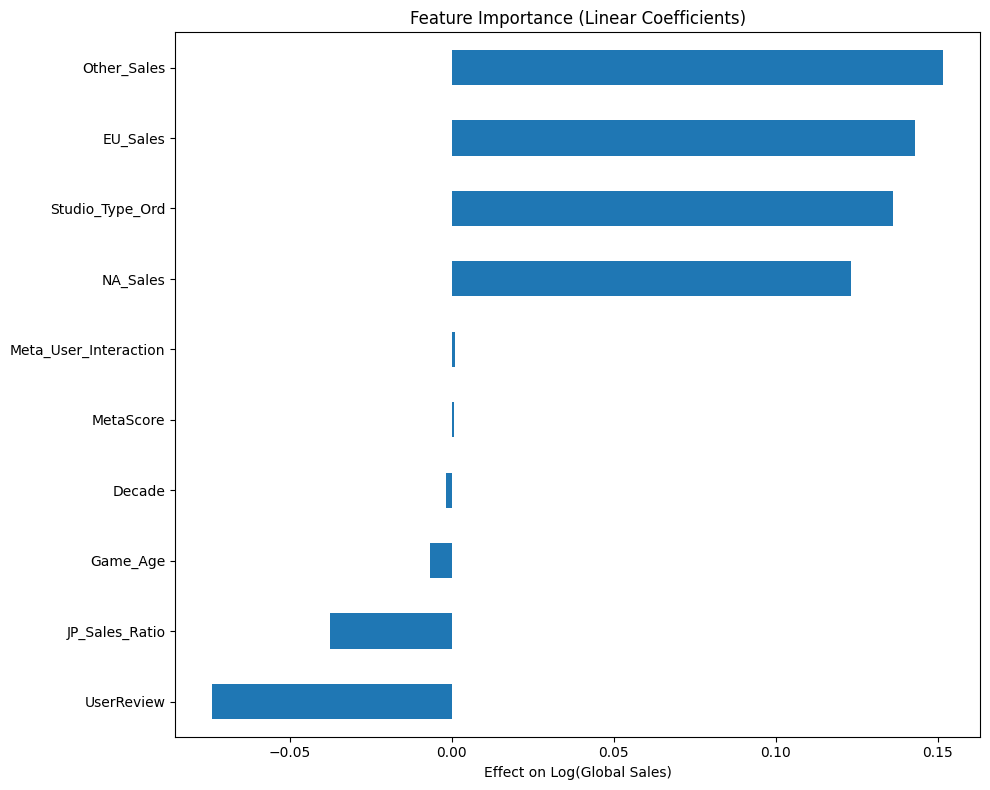

In [16]:
import numpy as np

# Only works for linear models
coefs = pd.Series(model.coef_, index=X.columns).sort_values()

plt.figure(figsize=(10, 8))
coefs.plot(kind='barh')
plt.title('Feature Importance (Linear Coefficients)')
plt.xlabel('Effect on Log(Global Sales)')
plt.tight_layout()
plt.show()

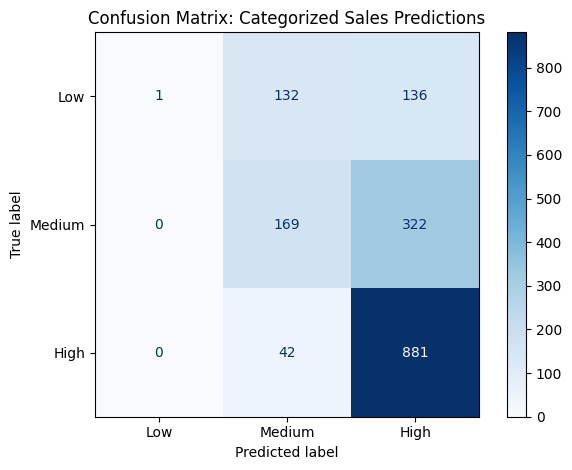

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 1. Define bins and labels
bins = np.quantile(y, [0, 1/3, 2/3, 1])
labels = ['Low', 'Medium', 'High']

# 2. Bin the actual and predicted values
y_test_cat = pd.cut(y_test, bins=bins, labels=labels, include_lowest=True).astype(str)
y_pred_cat = pd.cut(y_pred, bins=bins, labels=labels, include_lowest=True).astype(str)

# 3. Compute and display confusion matrix
cm = confusion_matrix(y_test_cat, y_pred_cat, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Categorized Sales Predictions')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Make sure X and y are defined — same as before
# (You already did this part in earlier code)

# Drop rows with missing values, same as linear model setup
non_na_idx = X.dropna().index
X_clean = X.loc[non_na_idx]
y_clean = y.loc[non_na_idx]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, random_state=42)

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"Random Forest Results:")
print(f"R² score: {r2_rf:.4f}")
print(f"RMSE (on log sales): {rmse_rf:.4f}")

Random Forest Results:
R² score: 0.9941
RMSE (on log sales): 0.0494


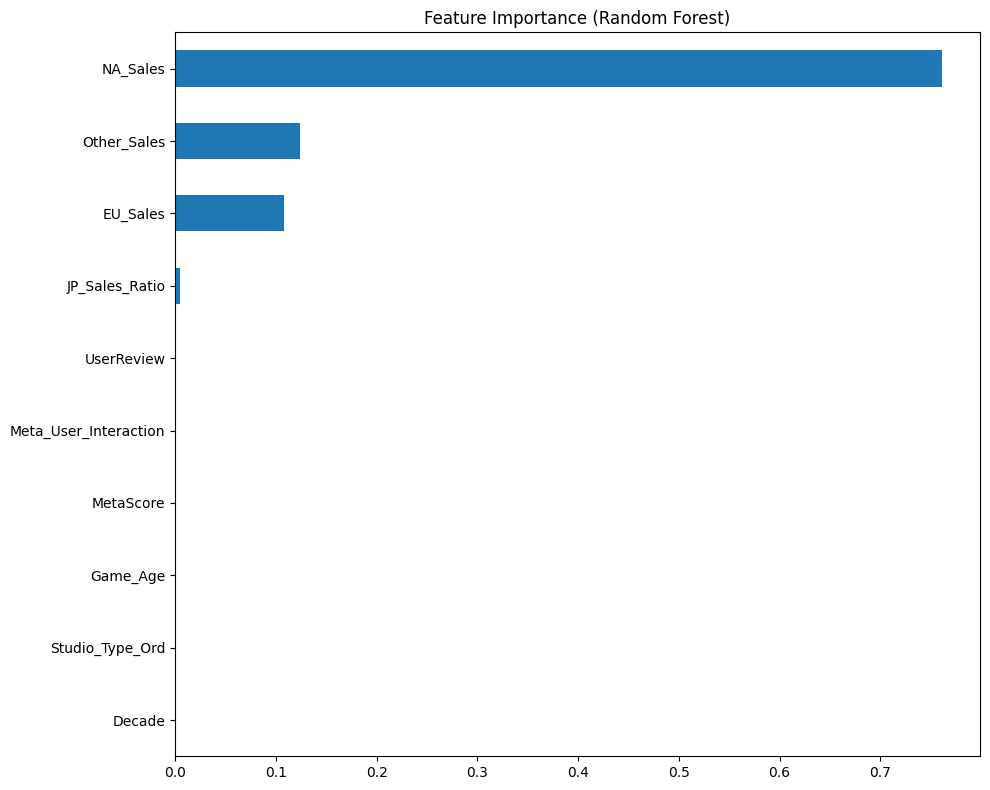

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Get importance values and sort
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values()

# Plot
plt.figure(figsize=(10, 8))
importances.plot(kind='barh')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

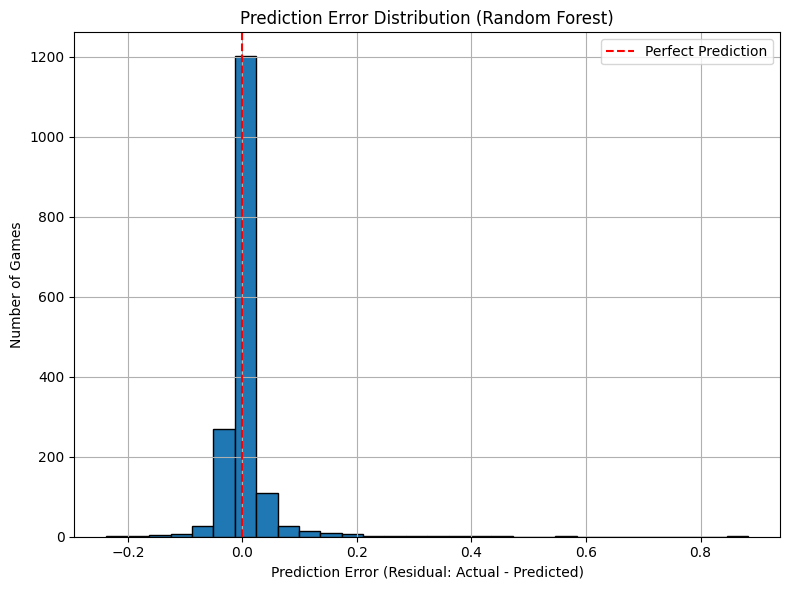

In [21]:
import matplotlib.pyplot as plt

# Calculate residuals (errors)
residuals_rf = y_test - y_pred_rf

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals_rf, bins=30, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Prediction Error Distribution (Random Forest)')
plt.xlabel('Prediction Error (Residual: Actual - Predicted)')
plt.ylabel('Number of Games')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [24]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Step 1: Drop any "cheating" sales features
cols_to_drop = [
    'Global_Sales', 'Log_Global_Sales',
    'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
    'Publisher', 'Name', 'Developer', 'Release_Year'
]

X_gb = df.drop(columns=cols_to_drop, errors='ignore')
X_gb = X_gb.select_dtypes(include=[np.number])  # numeric features only

y_gb = df['Log_Global_Sales']

# Step 2: Gradient Boosting handles NaNs, so no need to drop missing
X_train, X_test, y_train, y_test = train_test_split(X_gb, y_gb, random_state=42)

# Step 3: Train model
gb_model = HistGradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred_gb = gb_model.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))

print("Gradient Boosting Results:")
print(f"R² score: {r2_gb:.4f}")
print(f"RMSE (log sales): {rmse_gb:.4f}")

Gradient Boosting Results:
R² score: 0.5322
RMSE (log sales): 0.3600


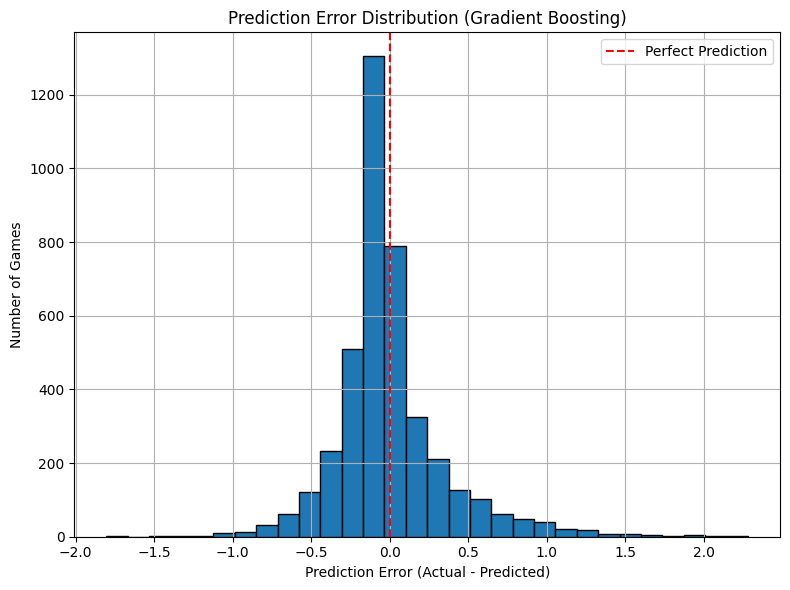

In [23]:
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(8, 6))
plt.hist(residuals_gb, bins=30, edgecolor='black')
plt.axvline(0, color='red', linestyle='--', label='Perfect Prediction')
plt.title('Prediction Error Distribution (Gradient Boosting)')
plt.xlabel('Prediction Error (Actual - Predicted)')
plt.ylabel('Number of Games')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

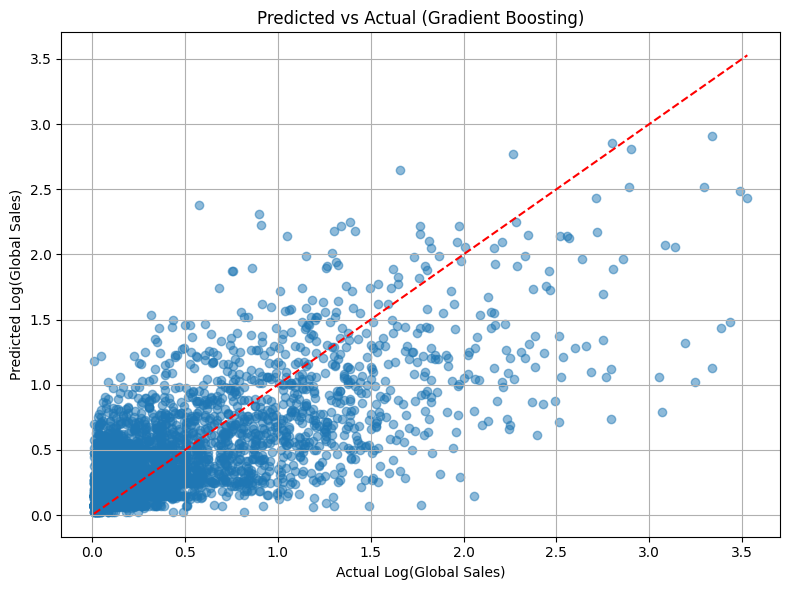

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual Log(Global Sales)')
plt.ylabel('Predicted Log(Global Sales)')
plt.title('Predicted vs Actual (Gradient Boosting)')
plt.grid(True)
plt.tight_layout()
plt.show()